<a href="https://colab.research.google.com/github/kabeerbora/ECON5625/blob/main/Matching.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Subclassification

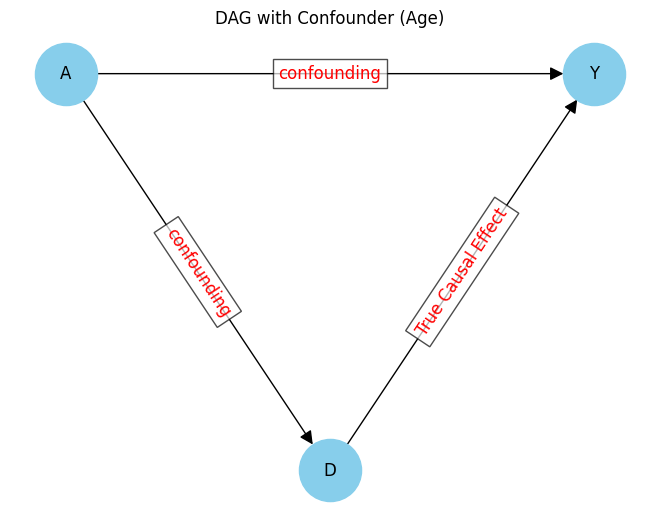

In [ ]:
G = nx.DiGraph()
G.add_edges_from([
    ("D", "Y"),    # X → Y
    ("A", "D"),    # Z → X
    ("A", "Y")     # Z → Y
])

pos = {"A": (0, 1), "D": (1, 0), "Y": (2, 1)}
nx.draw(G, pos, with_labels=True, node_size=2000, node_color="skyblue", arrowsize=20)
edge_labels = {
    ("A", "D"): "confounding",
    ("A", "Y"): "confounding",
    ("D", "Y"): "True Causal Effect"
}

nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels,
                             font_color="red", font_size=12,
                             label_pos=0.5, bbox=dict(facecolor='white', alpha=0.7))

plt.title("DAG with Confounder (Age)")
plt.show()

## Titanic Dataset

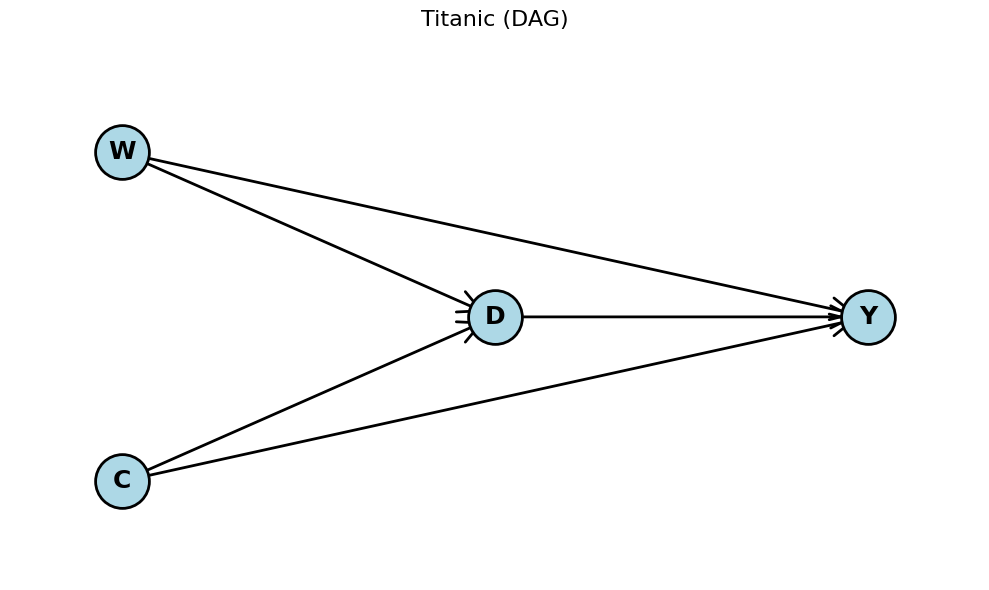

Graph Structure:
Nodes: ['W', 'D', 'Y', 'C']
Edges: [('W', 'D'), ('W', 'Y'), ('D', 'Y'), ('C', 'D'), ('C', 'Y')]
Number of nodes: 4
Number of edges: 5


In [3]:
import matplotlib.pyplot as plt
import networkx as nx
G = nx.DiGraph()
G.add_edges_from([
    ("W", "D"),  # W to D
    ("W", "Y"),  # W to Y
    ("C", "D"),  # C to D
    ("C", "Y"),  # C to Y
    ("D", "Y")   # D to Y
])
pos = {
    "W": (0, 1),    # Top left
    "C": (0, 0),    # Bottom left
    "D": (1, 0.5),  # Middle
    "Y": (2, 0.5)   # Right
}
plt.figure(figsize=(10, 6))
nx.draw_networkx_nodes(
    G, pos,
    node_size=1500,
    node_color="lightblue",
    edgecolors="black",
    linewidths=2
)
nx.draw_networkx_edges(
    G, pos,
    arrowstyle="->,head_width=0.4,head_length=0.8",
    arrowsize=20,
    width=2,
    edge_color="black"
)
nx.draw_networkx_labels(
    G, pos,
    font_size=18,
    font_weight="bold"
)
plt.title("Titanic (DAG)", fontsize=16, pad=20)
plt.axis('off')
plt.tight_layout()
plt.xlim(-0.3, 2.3)
plt.ylim(-0.3, 1.3)
plt.show()

print("Graph Structure:")
print(f"Nodes: {list(G.nodes())}")
print(f"Edges: {list(G.edges())}")
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")

In [4]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from itertools import combinations
import plotnine as p

# read data
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
def read_data(file):
    return pd.read_stata("https://github.com/scunning1975/mixtape/raw/master/" + file)



## Simple Difference in Outcomes
titanic = read_data("titanic.dta")

titanic['d'] = 0
titanic.loc[titanic['class']=='1st class', 'd'] = 1

titanic['sex_d'] = 0
titanic.loc[titanic['sex']=='man', 'sex_d'] = 1

titanic['age_d'] = 0
titanic.loc[titanic['age']=='adults', 'age_d'] = 1

titanic['survived_d'] = 0
titanic.loc[titanic['survived']=='yes', 'survived_d'] = 1


ey0 = titanic.loc[titanic['d']==0, 'survived_d'].mean()
ey1 = titanic.loc[titanic['d']==1, 'survived_d'].mean()

sdo = ey1 - ey0
print("The simple difference in outcomes is {:.2%}".format(sdo))

The simple difference in outcomes is 35.38%


In [5]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from itertools import combinations
import plotnine as p

# read data
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
def read_data(file):
    return pd.read_stata("https://github.com/scunning1975/mixtape/raw/master/" + file)




titanic = read_data("titanic.dta")

titanic['d'] = 0
titanic.loc[titanic['class']=='1st class', 'd'] = 1

titanic['sex_d'] = 0
titanic.loc[titanic['sex']=='man', 'sex_d'] = 1

titanic['age_d'] = 0
titanic.loc[titanic['age']=='adults', 'age_d'] = 1

titanic['survived_d'] = 0
titanic.loc[titanic['survived']=='yes', 'survived_d'] = 1

titanic['s'] = 0
titanic.loc[(titanic.sex_d == 0) & (titanic.age_d==1), 's'] = 1
titanic.loc[(titanic.sex_d == 0) & (titanic.age_d==0), 's'] = 2
titanic.loc[(titanic.sex_d == 1) & (titanic.age_d==1), 's'] = 3
titanic.loc[(titanic.sex_d == 1) & (titanic.age_d==0), 's'] = 4

obs = titanic.loc[titanic.d == 0].shape[0]

def weighted_avg_effect(df):
    diff = df[df.d==1].survived_d.mean() - df[df.d==0].survived_d.mean()
    weight = df[df.d==0].shape[0]/obs
    return diff*weight

wate = titanic.groupby('s').apply(weighted_avg_effect).sum()

print("The weigthted average treatment effect estimate is {:.2%}".format(wate))

The weigthted average treatment effect estimate is 18.88%


/tmp/ipython-input-5-2464872596.py:44: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.


#Matching

##Exact Matching

/tmp/ipython-input-9-1302290248.py:32: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.


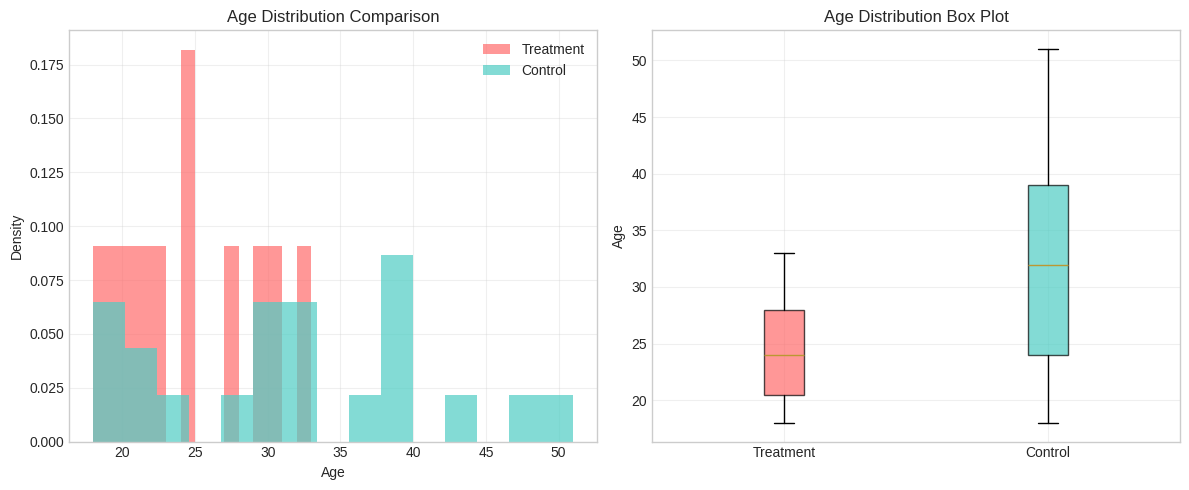

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
def read_data(file):
    return pd.read_stata("https://github.com/scunning1975/mixtape/raw/master/" + file)
training_example = read_data("training_example.dta")
age_treat = training_example['age_treat'].dropna()
age_control = training_example['age_control'].dropna()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.hist(age_treat, bins=15, alpha=0.7, label='Treatment', color='#FF6B6B', density=True)
ax1.hist(age_control, bins=15, alpha=0.7, label='Control', color='#4ECDC4', density=True)
ax1.set_xlabel('Age')
ax1.set_ylabel('Density')
ax1.set_title('Age Distribution Comparison')
ax1.legend()
ax1.grid(True, alpha=0.3)

box_plot = ax2.boxplot([age_treat, age_control],
                       labels=['Treatment', 'Control'],
                       patch_artist=True)
colors = ['#FF6B6B', '#4ECDC4']
for patch, color in zip(box_plot['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)
ax2.set_ylabel('Age')
ax2.set_title('Age Distribution Box Plot')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()